In [262]:
import pandas as pd
df = pd.read_csv('flavors_of_cacao1.csv')
import statsmodels.api as sm
import numpy as np

In [263]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


stats.chisqprob(10,3)


0.01856613546304325

In [264]:
df


,Company,SpecificBean,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


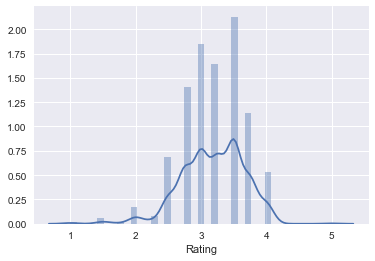

In [265]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
sns.distplot(df["Rating"])

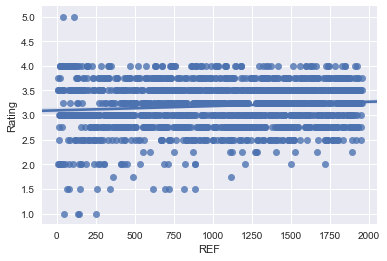

In [266]:

sns.regplot(x=df["REF"], y=df["Rating"])

In [267]:
df["CocoaPercent"] = df["CocoaPercent"].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

In [268]:
dummy_ranks = pd.get_dummies(df['BroadBeanOrigin'], prefix = 'origin')
dummy_ranks.head()

,"origin_Africa, Carribean, C. Am.",origin_Australia,origin_Belize,origin_Bolivia,origin_Brazil,origin_Burma,origin_Cameroon,origin_Carribean,origin_Carribean(DR/Jam/Tri),origin_Central and S. America,...,origin_Venezuela,"origin_Venezuela, Carribean","origin_Venezuela, Dom. Rep.","origin_Venezuela, Ghana","origin_Venezuela, Java","origin_Venezuela, Trinidad",origin_Venezuela/ Ghana,origin_Vietnam,origin_West Africa,origin_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
cols_to_keep = ['Rating', 'CocoaPercent']
data = df[cols_to_keep].join(dummy_ranks)
data.head()

,Rating,CocoaPercent,"origin_Africa, Carribean, C. Am.",origin_Australia,origin_Belize,origin_Bolivia,origin_Brazil,origin_Burma,origin_Cameroon,origin_Carribean,...,origin_Venezuela,"origin_Venezuela, Carribean","origin_Venezuela, Dom. Rep.","origin_Venezuela, Ghana","origin_Venezuela, Java","origin_Venezuela, Trinidad",origin_Venezuela/ Ghana,origin_Vietnam,origin_West Africa,origin_
0,3.75,0.63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.75,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.00,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.50,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.50,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
dummy_compL = pd.get_dummies(df['CompanyLocation'], prefix = 'compL')
dummy_compL.head()

,compL_Amsterdam,compL_Argentina,compL_Australia,compL_Austria,compL_Belgium,compL_Bolivia,compL_Brazil,compL_Canada,compL_Chile,compL_Colombia,...,compL_Spain,compL_St. Lucia,compL_Suriname,compL_Sweden,compL_Switzerland,compL_U.K.,compL_U.S.A.,compL_Venezuela,compL_Vietnam,compL_Wales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
dummy_comp = pd.get_dummies(df['Company'], prefix = 'comp')
dummy_comp.head()

,comp_A. Morin,comp_AMMA,comp_Acalli,comp_Adi,comp_Aequare (Gianduja),comp_Ah Cacao,comp_Akesson's (Pralus),comp_Alain Ducasse,comp_Alexandre,comp_Altus aka Cao Artisan,...,comp_Xocolla,comp_Zak's,comp_Zart Pralinen,comp_Zokoko,comp_Zotter,comp_hello cocoa,comp_hexx,comp_iQ Chocolate,comp_organicfair,comp_twenty-four blackbirds
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
data = data.join(dummy_comp)
data = data.join(dummy_compL)
data.head()

,Rating,CocoaPercent,"origin_Africa, Carribean, C. Am.",origin_Australia,origin_Belize,origin_Bolivia,origin_Brazil,origin_Burma,origin_Cameroon,origin_Carribean,...,compL_Spain,compL_St. Lucia,compL_Suriname,compL_Sweden,compL_Switzerland,compL_U.K.,compL_U.S.A.,compL_Venezuela,compL_Vietnam,compL_Wales
0,3.75,0.63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.75,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.00,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.50,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.50,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
def label_rating (row):
    if row['Rating'] >= 3.5:
        return 1
    return 0

In [274]:
data['high_rating'] = data.apply (lambda row: label_rating(row), axis=1)

In [275]:
data.drop(['Rating'],axis=1)
data['compL_USA'] = data['compL_U.S.A.']
cols_to_keep = ['compL_France','compL_USA','compL_Austria', 'compL_Ecuador', 'compL_Switzerland', 'high_rating', "CocoaPercent" ]
dataOri = data[cols_to_keep]
#dataOri['intercept'] = 1.0



In [276]:
dataNew = dataOri[dataOri.compL_France != 0]

dataTemp = dataOri[dataOri.compL_Ecuador != 0]

frames = [dataNew, dataTemp]

dataNew = pd.concat (frames)

dataTemp = dataOri[dataOri.compL_Austria != 0]

frames = [dataNew, dataTemp]

dataNew = pd.concat (frames)

dataTemp = dataOri[dataOri.compL_Switzerland != 0]

frames = [dataNew, dataTemp]

dataNew = pd.concat (frames)

dataTemp = dataOri[dataOri.compL_USA != 0]

frames = [dataNew, dataTemp]

dataNew = pd.concat (frames)




In [277]:
#dataNew['intercept'] = 1.0
dataNew.head()

,compL_France,compL_USA,compL_Austria,compL_Ecuador,compL_Switzerland,high_rating,CocoaPercent
0,1,0,0,0,0,1,0.63
1,1,0,0,0,0,0,0.70
2,1,0,0,0,0,0,0.70
3,1,0,0,0,0,1,0.70
4,1,0,0,0,0,1,0.70


In [285]:
xData = dataNew[dataNew.columns[1:]]
yData = dataNew['high_rating']
Y = dataNew['CocoaPercent']
X = dataNew[dataNew.columns[1:6]]

logit = sm.Logit(yData, xData)
model = sm.OLS(Y, X)


In [286]:
estimate = model.fit()

In [287]:
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:           CocoaPercent   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1271.
Date:                Fri, 11 May 2018   Prob (F-statistic):               0.00
Time:                        21:37:41   Log-Likelihood:                -108.62
No. Observations:                1038   AIC:                             227.2
Df Residuals:                    1033   BIC:                             252.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
compL_USA             0.6508      0.01

In [290]:
estimate.conf_int(alpha=0.05, cols=None)

,0,1
compL_USA,0.628584,0.672949
compL_Austria,0.538379,0.747403
compL_Ecuador,0.596800,0.741862
compL_Switzerland,0.538729,0.712817
high_rating,0.150428,0.214087


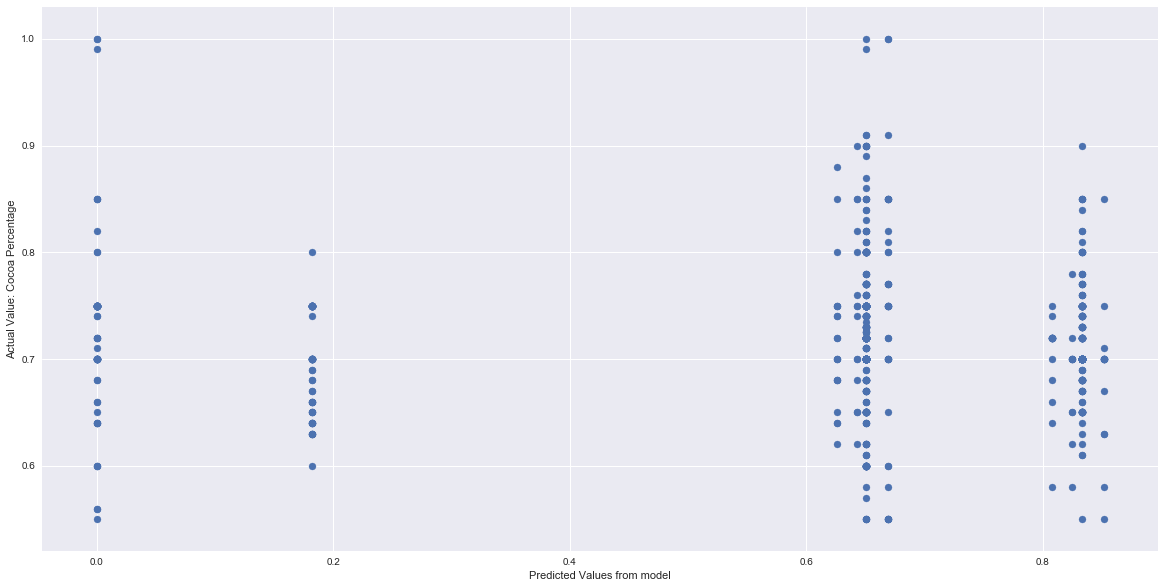

In [291]:
import matplotlib.pyplot as plt
predictions = estimate.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Cocoa Percentage")
plt.show()

In [283]:
result = logit.fit()

         Current function value: 0.000023
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [284]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            high_rating   No. Observations:                 1038
Model:                          Logit   Df Residuals:                     1032
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 May 2018   Pseudo R-squ.:                   1.000
Time:                        21:37:23   Log-Likelihood:              -0.023510
converged:                      False   LL-Null:                       -686.57
                                        LLR p-value:                9.266e-295
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
compL_USA           -24.9197   1.78e+08   -1.4e-07      1.000   -3.49e+08    3.49e+08
compL_Austria        -1.0704   8635.092     -0.000      1.000   -1.69e+04    1.69e+04
compL_Ecuador         1.

In [292]:
print(np.exp(result.params))

compL_USA            1.504855e-11
compL_Austria        3.428552e-01
compL_Ecuador        4.859129e+00
compL_Switzerland    3.859677e+05
high_rating          5.535528e+28
CocoaPercent         2.894975e-13
dtype: float64


In [293]:
print(result.conf_int())


                              0             1
compL_USA         -3.492306e+08  3.492305e+08
compL_Austria     -1.692554e+04  1.692340e+04
compL_Ecuador     -1.033667e+03  1.036828e+03
compL_Switzerland -2.333554e+02  2.590824e+02
high_rating       -3.492305e+08  3.492306e+08
CocoaPercent      -4.052765e+02  3.475352e+02


In [294]:
params = result.params
conf = result.conf_int()
conf['OddsRatio'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
print(np.exp(conf))

                            2.5%          97.5%     OddsRatio
compL_USA           0.000000e+00            inf  1.504855e-11
compL_Austria       0.000000e+00            inf  3.428552e-01
compL_Ecuador       0.000000e+00            inf  4.859129e+00
compL_Switzerland  4.519110e-102  3.296469e+112  3.859677e+05
high_rating         0.000000e+00            inf  5.535528e+28
CocoaPercent       9.787474e-177  8.562864e+150  2.894975e-13


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [295]:
cols_to_keep = ['Rating', 'CocoaPercent']
data = df[cols_to_keep].join(dummy_ranks)

In [296]:
data['high_rating'] = data.apply (lambda row: label_rating(row), axis=1)

In [297]:
data = data.drop(['Rating'],axis=1)


In [298]:
xData = data[data.columns[1:]]
yData = data['high_rating']
data.head()

,CocoaPercent,"origin_Africa, Carribean, C. Am.",origin_Australia,origin_Belize,origin_Bolivia,origin_Brazil,origin_Burma,origin_Cameroon,origin_Carribean,origin_Carribean(DR/Jam/Tri),...,"origin_Venezuela, Carribean","origin_Venezuela, Dom. Rep.","origin_Venezuela, Ghana","origin_Venezuela, Java","origin_Venezuela, Trinidad",origin_Venezuela/ Ghana,origin_Vietnam,origin_West Africa,origin_,high_rating
0,0.63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [299]:
logit = sm.Logit(yData, xData)

In [300]:
result = logit.fit()

         Current function value: inf
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
E:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix